<a href="https://colab.research.google.com/github/njadux/TensorFlow/blob/main/TensorFlow_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression with **TensorFlow**

The equation of a simple linear model is

𝑌=𝑎𝑋+𝑏

Where Y is the dependent variable and X is the independent variable, and a and b being the parameters we adjust. a is known as "slope" or "gradient" and b is the "intercept"

In [ ]:
!pip install tensorflow==2.9.0
!pip install grpcio==1.24.3 #allowing tf to distribute workloads across diferent machines - GPUs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 22.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 24.3.25
    Uninstalling flatbuffers-24.3.25:
      Successfully uninstalled flatbuffers-24.3.25
  Attempting uninstall: tensorboard-data-serve

ERROR: Operation cancelled by user


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # allows to draw shapes on plot
import pandas as pd
import tensorflow as tf
import pylab as pl
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6) #10 inches wide and 6 tall

In [ ]:
if not tf.__version__ == '2.9.0' :
  print(tf.__version__)

2.17.0


In [ ]:
x =np.arange(0.0, 0.8, 0.1) #(start, end, step)
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])

In [ ]:
a= 2
b= 0
y= a*x+b
y

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4])

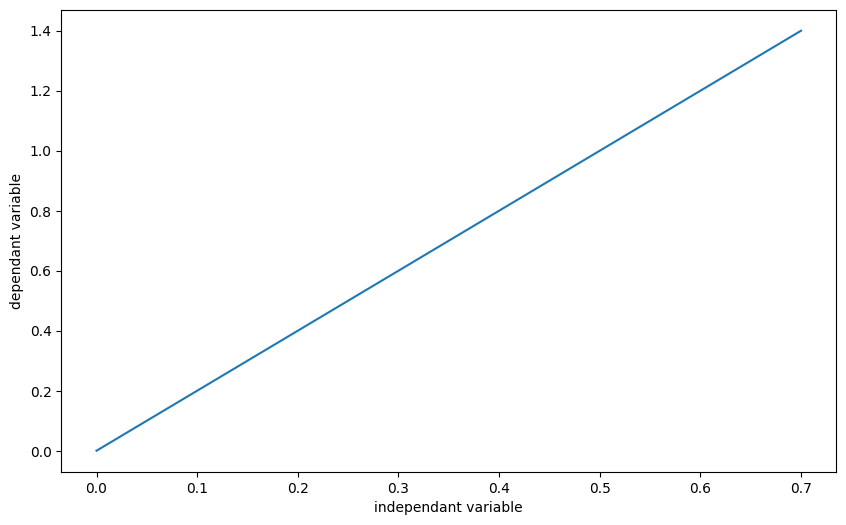

In [ ]:
plt.plot(x,y)
plt.xlabel('independant variable')
plt.ylabel('dependant variable')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/datasets

/content/drive/MyDrive/datasets


In [ ]:
ls

bank.csv  Churn_Modelling.csv  FuelConsumption.csv  kc_final.csv


In [ ]:
!pip install chardet
import chardet
# Detect the encoding of the file
with open('FuelConsumption.csv', 'rb') as f:
  result = chardet.detect(f.read())

In [ ]:
data= pd.read_csv('FuelConsumption.csv', encoding=result['encoding'])

In [ ]:
tf.data.head(10)

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2024,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,7
1,2024,Acura,Integra A-SPEC,Full-size,1.5,4,M6,Z,8.9,6.5,7.8,36,181,6,6
2,2024,Acura,Integra Type S,Full-size,2.0,4,M6,Z,11.1,8.3,9.9,29,230,5,6
3,2024,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
4,2024,Acura,MDX SH-AWD Type S,Sport utility vehicle: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4,5
5,2024,Acura,RDX SH-AWD,Sport utility vehicle: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
6,2024,Acura,RDX SH-AWD A-SPEC,Sport utility vehicle: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,241,5,6
7,2024,Alfa Romeo,Giulia,Mid-size,2.0,4,A8,Z,10.0,7.2,8.7,32,205,5,5
8,2024,Alfa Romeo,Giulia AWD,Mid-size,2.0,4,A8,Z,10.5,7.7,9.2,31,217,5,5
9,2024,Alfa Romeo,Giulia Quadrifoglio,Mid-size,2.9,6,A8,Z,13.5,9.3,11.6,24,271,4,3


In [ ]:
tf.data.describe()

,Model year,Engine size (L),Cylinders,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
count,768.0,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,2024.0,3.086198,5.541667,12.410417,9.432552,11.071224,27.332031,259.190104,4.479167,5.497396
std,0.0,1.268500,1.891678,3.392118,2.303873,2.845196,7.710060,64.902216,1.304723,1.607510
min,2024.0,1.200000,3.000000,4.400000,4.400000,4.400000,11.000000,104.000000,1.000000,1.000000
25%,2024.0,2.000000,4.000000,10.100000,7.700000,9.000000,22.000000,210.000000,4.000000,5.000000
50%,2024.0,3.000000,6.000000,12.250000,9.300000,11.000000,26.000000,260.000000,4.000000,6.000000
75%,2024.0,3.600000,6.000000,14.500000,10.825000,12.800000,31.000000,299.000000,5.000000,7.000000
max,2024.0,8.000000,16.000000,30.300000,20.900000,26.100000,64.000000,608.000000,8.000000,8.000000


from matplotlib import pyplot as plt
_df_0['Model year'].plot(kind='hist', bins=20, title='Model year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Engine size (L)'].plot(kind='hist', bins=20, title='Engine size (L)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Cylinders'].plot(kind='hist', bins=20, title='Cylinders')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['City (L/100 km)'].plot(kind='hist', bins=20, title='City (L/100 km)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Model year', y='Engine size (L)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Engine size (L)', y='Cylinders', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Cylinders', y='City (L/100 km)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='City (L/100 km)', y='Highway (L/100 km)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Model year'].plot(kind='line', figsize=(8, 4), title='Model year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Engine size (L)'].plot(kind='line', figsize=(8, 4), title='Engine size (L)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Cylinders'].plot(kind='line', figsize=(8, 4), title='Cylinders')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['City (L/100 km)'].plot(kind='line', figsize=(8, 4), title='City (L/100 km)')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='Model year', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Engine size (L)', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='Cylinders', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='City (L/100 km)', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
tf.data.drop(['Fuel type','Combined (mpg)','CO2 rating','Smog rating'], axis=1)

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,City (L/100 km),Highway (L/100 km),Combined (L/100 km),CO2 emissions (g/km)
0,2024,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,8.1,6.5,7.4,172
1,2024,Acura,Integra A-SPEC,Full-size,1.5,4,M6,8.9,6.5,7.8,181
2,2024,Acura,Integra Type S,Full-size,2.0,4,M6,11.1,8.3,9.9,230
3,2024,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS10,12.6,9.4,11.2,263
4,2024,Acura,MDX SH-AWD Type S,Sport utility vehicle: Standard,3.0,6,AS10,13.8,11.2,12.4,291
...,...,...,...,...,...,...,...,...,...,...,...
763,2024,Volvo,V60 CC B5 AWD,Station wagon: Small,2.0,4,AS8,10.0,7.5,8.9,207
764,2024,Volvo,V90 CC B6 AWD,Station wagon: Mid-size,2.0,4,AS8,10.7,8.1,9.5,223
765,2024,Volvo,XC40 B5 AWD,Sport utility vehicle: Small,2.0,4,AS8,9.9,7.8,9.0,210
766,2024,Volvo,XC60 B5 AWD,Sport utility vehicle: Small,2.0,4,AS8,10.6,8.3,9.6,226


Using linear regression to predict Co2Emission of cars based on their engine size.

explaining the differrence between **tf.tensors and np.asanyarray **
- If you're working within a TensorFlow pipeline, using tf.data.Dataset and tf.Tensor objects is often preferred due to potential performance benefits and integration with other TensorFlow operations. However, if you're performing data analysis or preprocessing before feeding data into a model, Pandas and NumPy might be more convenient and flexible.

In [ ]:
from re import X
#define X and Y
X = tf.data['Engine size (L)']
Y = tf.data['CO2 emissions (g/km)']

In [ ]:
X

,Engine size (L)
0,1.5
1,1.5
2,2.0
3,3.5
4,3.0
...,...
763,2.0
764,2.0
765,2.0
766,2.0


In [ ]:
train_x = np.asanyarray(tf.data[['Engine size (L)']]) #returns dataframe into col then conver into array
train_y = np.asanyarray(tf.data[['CO2 emissions (g/km)']])

In [ ]:
train_x

array([[1.5],
       [1.5],
       [2. ],
       [3.5],
       [3. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2.9],
       [2. ],
       [2. ],
       [2.9],
       [2. ],
       [4. ],
       [5.2],
       [4. ],
       [4. ],
       [5.2],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [3. ],
       [3. ],
       [3. ],
       [3. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [3. ],
       [3. ],
       [2.9],
       [2.9],
       [4. ],
       [4. ],
       [4. ],
       [2. ],
       [3. ],
       [3. ],
       [3. ],
       [3. ],
       [2.9],
       [2.9],
       [4. ],
       [3. ],
       [3. ],
       [4. ],
       [4. ],
       [4. ],
       [4. ],
       [4. ],
       [6. ],
       [4. ],
       [6. ],
       [4. ],
       [6. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [4.4],
       [4.4],
       [4.4],
      

In [ ]:
a = tf.Variable(20.0)
b = tf.Variable(30.2)

In [ ]:
a

In [ ]:
def linear_function(train_x):
  y_pred = a*train_x +b
  return y_pred

In [ ]:
def loss_function(y_pred, train_y):
  loss= tf.reduce_mean(tf.square(y_pred - train_y)) #tf.reduce('average (mean) value of a tensor along a specified axis')
  return loss

# GradientTape

- determine how to adjust the model's parameters (e.g., weights and biases) to minimize the loss function and improve the model's performance.

In [ ]:
learning_rate = 0.01 #how quickly the model's parameters are updated.
train_data = [] # list to store feature x and target y
loss_values = [] # list to store calculated loss values
a_values = [] # list to store updated a values during traning process - a is  the slope of the linear relationship between the input features and the target values.
b_values = [] # list to store values of b > determines the y-intercept

In [ ]:
#steps of looping to update parameters
training_epochs = 200 #training process repeats 200 times.

Train the model

In [ ]:
for epoch in range(training_epochs):
  with tf.GradientTape() as tape:   #dervative dy_dx
    y_pred = linear_function(train_x)
    loss_value = loss_function(y_pred, train_y)
    loss_values.append(loss_value)

    #get gradient
    gradients = tape.gradient(loss_value, [a,b]) # calc gradient for the loss fun values

    #compute and adjust weights
    a_values.append(a.numpy())
    b_values.append(b.numpy())

    #update parameters
    a.assign_sub(gradients[0]*learning_rate)  #ubtracting the value provided as an argument >- calculates the step size for updating a
    b.assign_sub(gradients[1]*learning_rate)
    if epoch % 5 == 0:
      train_data.append([a.numpy(),b.numpy()])

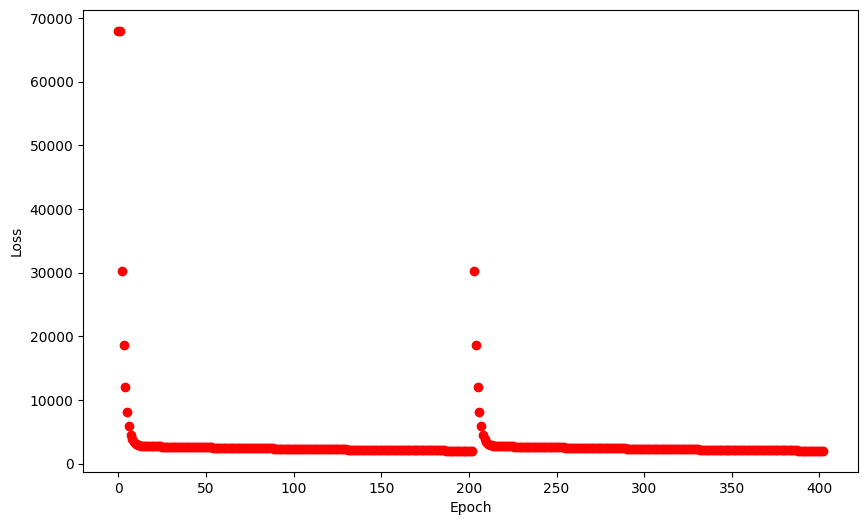

In [ ]:
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(loss_values, 'ro')

Need to be studied

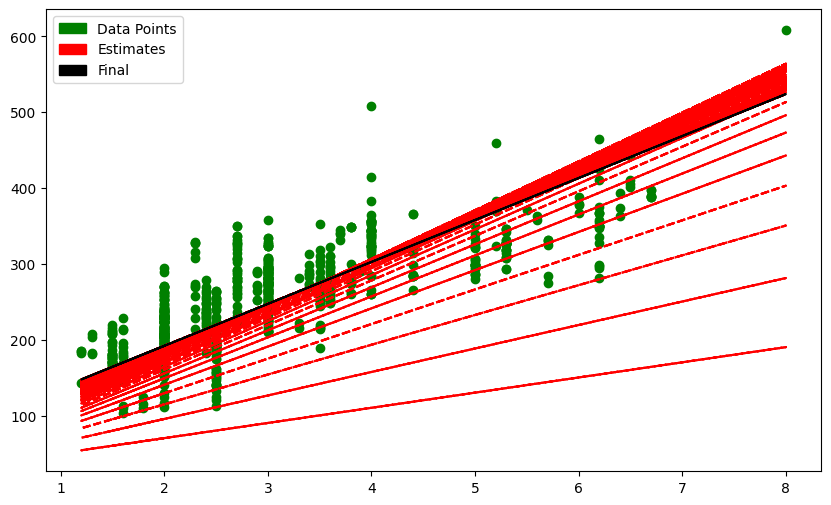

In [ ]:
plt.scatter(train_x, train_y, color='green')
for a,b in zip(a_values[0:len(a_values)], b_values[0:len(b_values)]):
    plt.plot(train_x,a*train_x+b, color='red', linestyle='dashed')
plt.plot(train_x,a_values[-1]*train_x+b_values[-1], color='black')

final = mpatches.Patch(color='Black', label='Final')
estimates = mpatches.Patch(color='Red', label='Estimates')
data = mpatches.Patch(color='Green', label='Data Points')

plt.legend(handles=[data, estimates, final])

plt.show()